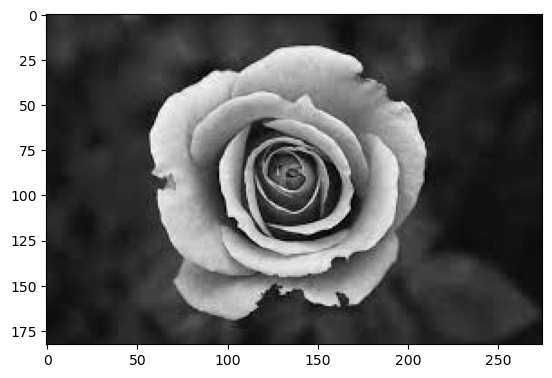

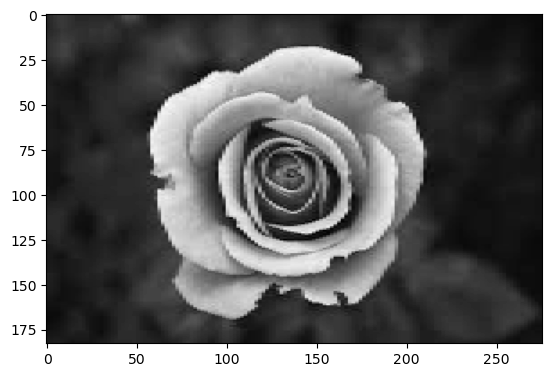

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pywt
import cv2    


imArray = cv2.imread("flower.jpg")
#Datatype conversions
#convert to grayscale
imArray = cv2.cvtColor( imArray,cv2.COLOR_BGR2GRAY )
#convert to float
imArray =  np.float32(imArray)   
imArray_norm = imArray / 255;
# compute coefficients 
coeffs=pywt.wavedec(imArray_norm, 'db1', level=2)

thresh = 0.5*np.nanmax(imArray_norm)
#Process Coefficients

coeffs[2:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeffs[2:])

# reconstruction
imArray_H=pywt.waverec(coeffs, "db1");
imArray_H *= 255;
imArray_H =  np.uint8(imArray_H)


plt.imshow(imArray,cmap='gray')
plt.show()
plt.imshow(imArray_H,cmap='gray')
plt.show()

# Image Feature Extraction

Represent an image as a vector of real values 

## Pixel values itself as an image descriptor 

In [3]:
img = cv2.imread("flower.jpg",0)
features = img.ravel()
print(features)

[40 41 43 ... 22 22 22]


## Mean of RGB values as a color descriptor

[218.06427558 167.50024739 159.86009421]
[210.98303105 165.92976794 152.08094408]
[229.93856711 234.19669511 181.55379956]


(<Axes: >, <matplotlib.image.AxesImage at 0x22250c26b10>)

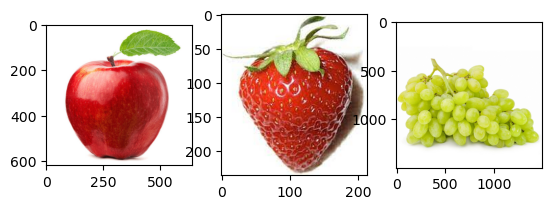

In [4]:
img1 = cv2.imread("Apple.png")
img1 = cv2.cvtColor( img1,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img1)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

img2 = cv2.imread("strawberry.jpg")
img2 = cv2.cvtColor( img2,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img2)
features = np.array((channels[0], channels[1], channels[2]))
print(features)
img3 = cv2.imread("grapes.jpg")
img3 = cv2.cvtColor( img3,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img3)
features = np.array((channels[0], channels[1], channels[2]))
print(features)
plt.subplot(131), plt.imshow(img1)
plt.subplot(132), plt.imshow(img2)
plt.subplot(133), plt.imshow(img3)

## Intensity invariant feature descriptors

(<Axes: >, <matplotlib.image.AxesImage at 0x22251497190>)

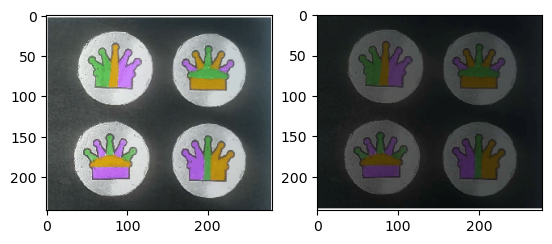

In [5]:
img1 = cv2.imread("intens1.png")
img2 = cv2.imread("intens2.png")
plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img2)

In [6]:

img_1_rgb = cv2.cvtColor( img1,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img_1_rgb)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

img_2_rgb = cv2.cvtColor( img2,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img_2_rgb)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

[112.55005928 115.31741257 112.30487552]
[46.39376166 47.4168518  45.48080512]


In [7]:

img_1_lab = cv2.cvtColor( img1,cv2.COLOR_BGR2LAB)
channels = cv2.mean(img_1_lab)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

img_2_lab = cv2.cvtColor( img2,cv2.COLOR_BGR2LAB)
channels = cv2.mean(img_2_lab)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

[121.1745406  127.16490812 130.05241553]
[ 48.14169555 127.23975829 129.28371693]


# Shape Based Feature Descriptors

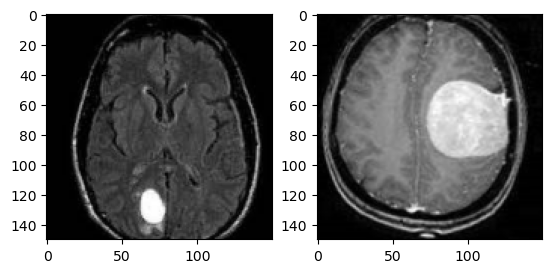

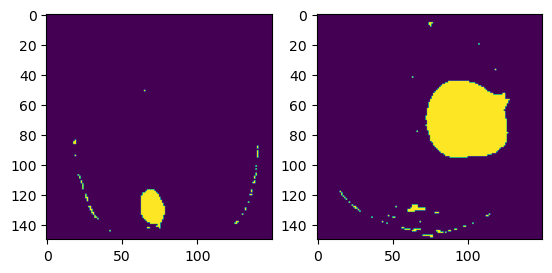

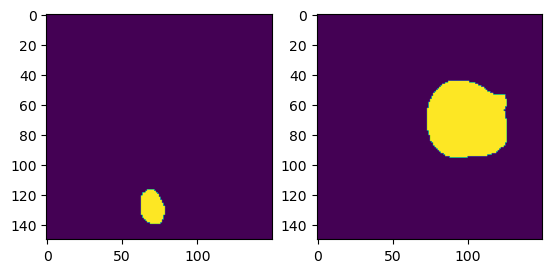

In [8]:
img1 = cv2.imread("brain1.jpg",cv2.IMREAD_COLOR)
img2 = cv2.imread("brain2.jpg",cv2.IMREAD_COLOR)

img1 = cv2.resize(img1,(150,150))
img2 = cv2.resize(img2,(150,150))

plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img2)
plt.show()

img1_gray = cv2.cvtColor( img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor( img2,cv2.COLOR_BGR2GRAY)


ret,t_img1 = cv2.threshold(img1_gray,160,255,cv2.THRESH_BINARY)
ret,t_img2 = cv2.threshold(img2_gray,160,255,cv2.THRESH_BINARY)

plt.subplot(121), plt.imshow(t_img1)
plt.subplot(122), plt.imshow(t_img2)
plt.show()

kernel = np.ones((5,5),np.uint8)
t_img1 = cv2.morphologyEx(t_img1, cv2.MORPH_OPEN, kernel)
t_img2 = cv2.morphologyEx(t_img2, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(t_img1)
plt.subplot(122), plt.imshow(t_img2)
plt.show()

In [9]:
f1=[]
f2=[]

contours1,hierarchy = cv2.findContours(t_img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours1[0]
contours2,hierarchy = cv2.findContours(t_img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt2 = contours2[0]

area1 = cv2.contourArea(cnt1)
print(area1)
f1.append(area1)

area2 = cv2.contourArea(cnt2)
print(area2)
f2.append(area2)

perimeter1 = cv2.arcLength(cnt1,True)
print(perimeter1)
f1.append(perimeter1)

perimeter2 = cv2.arcLength(cnt2,True)
print(perimeter2)
f2.append(perimeter2)


265.0
2202.5
63.455843448638916
180.46803605556488


16 23
53 51


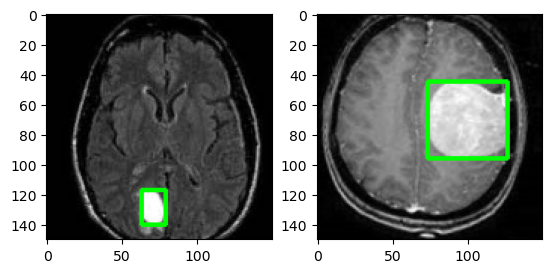

In [10]:
img1 = cv2.imread("brain1.jpg",cv2.IMREAD_COLOR)
img2 = cv2.imread("brain2.jpg",cv2.IMREAD_COLOR)

img1 = cv2.resize(img1,(150,150))
img2 = cv2.resize(img2,(150,150))

x,y,w,h = cv2.boundingRect(cnt1)
print(w,h)
f1.extend([w,h])
rimg_1 = cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

x,y,w,h = cv2.boundingRect(cnt2)
print(w,h)
f2.extend([w,h])
rimg_2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

plt.subplot(121), plt.imshow(rimg_1)
plt.subplot(122), plt.imshow(rimg_2)
plt.show()


71.0 128.0 11
100.44425964355469 70.0770492553711 29


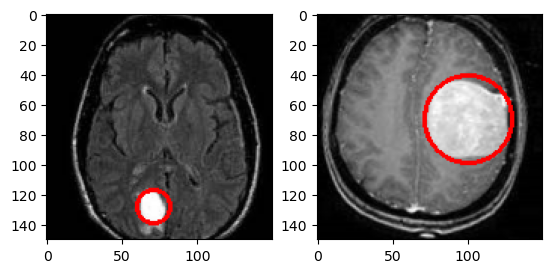

In [11]:
img1 = cv2.imread("brain1.jpg",cv2.IMREAD_COLOR)
img2 = cv2.imread("brain2.jpg",cv2.IMREAD_COLOR)

img1 = cv2.resize(img1,(150,150))
img2 = cv2.resize(img2,(150,150))
(x,y),radius = cv2.minEnclosingCircle(cnt1)
center = (int(x),int(y))
radius = int(radius)
print(x,y,radius)
f1.append(radius)
cimg_1 = cv2.circle(img1,center,radius,(255,0,0),2)


(x,y),radius = cv2.minEnclosingCircle(cnt2)
center = (int(x),int(y))
radius = int(radius)
print(x,y,radius)
f2.append(radius)
cimg_2 = cv2.circle(img2,center,radius,(255,0,0),2)
plt.subplot(121), plt.imshow(cimg_1)
plt.subplot(122), plt.imshow(cimg_2)
plt.show()

In [12]:
print(f1)
print(f2)

[265.0, 63.455843448638916, 16, 23, 11]
[2202.5, 180.46803605556488, 53, 51, 29]


In [ ]:
moments = cv2.moments(t_img1)
huMoments = cv2.HuMoments(moments)
print(huMoments.ravel())


[ 6.83637177e-04  7.44680573e-08  3.41298373e-12  1.90220139e-13
  1.43744928e-25  4.63011231e-17 -5.31837812e-26]


In [ ]:
moments = cv2.moments(t_img2)
huMoments = cv2.HuMoments(moments)
print(huMoments.ravel())

[6.32249269e-04 3.01149750e-09 1.29097007e-12 1.44878882e-14
 1.37014115e-27 4.62007585e-19 1.43127310e-27]


<img src="hu.png"> 